In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../..")
import pandas as pd
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
from xlstm_scaling_laws.analysis.parametric_sclaw_fit.data import (
    get_all_parametric_sclaw_fit_data_dataframe,
)
from xlstm_scaling_laws.analysis.parametric_sclaw_fit.plot.plot_model_training_data import (
    create_run_data_scatter_plot, get_combined_run_data_scatter_plot
)
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LogNorm, Normalize

from plot_config import savefig

In [2]:
logging.basicConfig(level=logging.FATAL, format="%(levelname)s: %(message)s")

# Visualize Scaling Law Fit Data - Combined

292 Llama Runs
380 xLSTM Runs


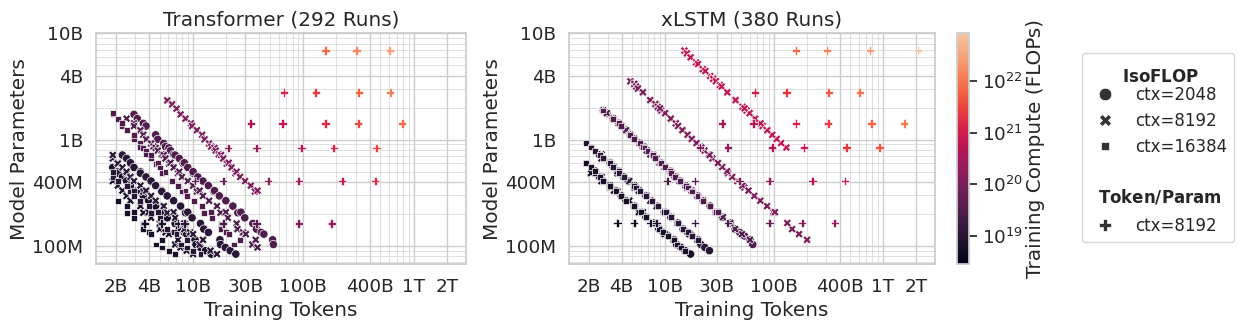

In [4]:
with sns.plotting_context("notebook", font_scale=1.2):
    with sns.axes_style("whitegrid"):
        fig = get_combined_run_data_scatter_plot(
            coloraxis="flops",
            add_axes_title=True,
            figsize=(12, 3),
        )

In [5]:
savefig(fig, "plot_run_data_scatter__flops")

292 Llama Runs
380 xLSTM Runs


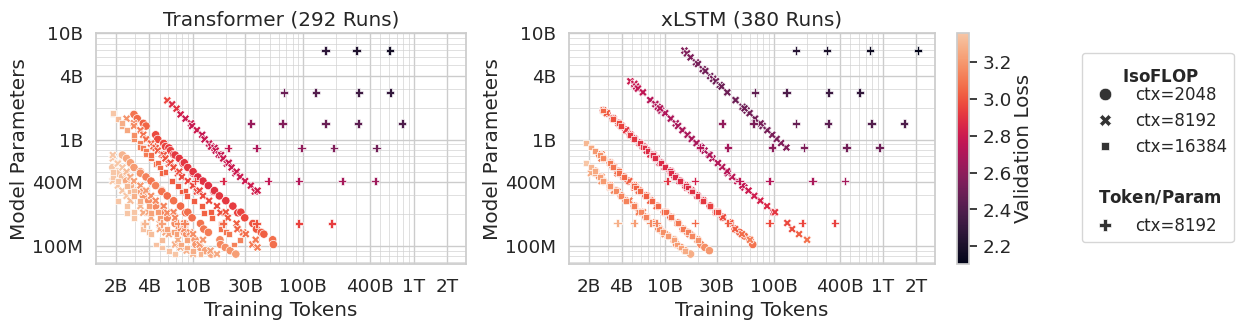

In [8]:
with sns.plotting_context("notebook", font_scale=1.2):
    with sns.axes_style("whitegrid"):
        fig = get_combined_run_data_scatter_plot(
            coloraxis="loss",
            add_axes_title=True,
            figsize=(12, 3),
        )

In [9]:
savefig(fig, "plot_run_data_scatter__loss")

# Visualize Scaling Law Fit Data - Single

In [7]:
mlstm_df = get_all_parametric_sclaw_fit_data_dataframe(model_type="mlstm")
mlstm_df

,experiment_set_ctx_length,name,run_tag,model_type,num_params,num_tokens_training,num_flops_training,val/.dclm_loss,token_param_ratio,width_depth_ratio,...,experiment_set,context_length,global_batch_size,num_train_steps,val/.dclm_perplexity,Preset Num Params,Model Size,embedding_dim,num_blocks,train/.loss_mean
0,isoflop_ctx2048,dclm_mLSTMv1_500M_ctx2048_lr0.002_steps2200_nb...,sclaw_mlstm_ctx_iso1,mlstm_v1,5.039970e+08,2.306867e+09,6.262124e+18,3.195950,4.577145,48.000000,...,isoflop,2048,512.0,2200.0,24.433379,<700M,NaN,1152,24,3.199042
1,isoflop_ctx2048,dclm_mLSTMv1_400M_ctx2048_lr0.003_steps2200_nb...,sclaw_mlstm_ctx_iso1,mlstm_v1,4.828152e+08,2.306867e+09,6.122120e+18,3.175613,4.777950,34.133333,...,isoflop,2048,512.0,2200.0,23.941480,<700M,NaN,1024,30,3.178646
2,isoflop_ctx2048,dclm_mLSTMv1_400M_ctx2048_lr0.003_steps2400_nb...,sclaw_mlstm_ctx_iso1,mlstm_v1,4.448361e+08,2.516582e+09,6.088588e+18,3.156029,5.657326,37.925926,...,isoflop,2048,512.0,2400.0,23.477187,<700M,NaN,1024,27,3.154049
3,isoflop_ctx2048,dclm_mLSTMv1_400M_ctx2048_lr0.003_steps2600_nb...,sclaw_mlstm_ctx_iso1,mlstm_v1,4.068569e+08,2.726298e+09,5.956709e+18,3.147214,6.700876,42.666667,...,isoflop,2048,512.0,2600.0,23.271146,<440M,NaN,1024,24,3.149693
4,isoflop_ctx2048,dclm_mLSTMv1_400M_ctx2048_lr0.003_steps3000_nb...,sclaw_mlstm_ctx_iso1,mlstm_v1,3.688777e+08,3.145728e+09,6.135515e+18,3.120673,8.527834,48.761905,...,isoflop,2048,512.0,3000.0,22.661622,<440M,NaN,1024,21,3.122402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,tokenparam_ctx8192,dclm_mLSTMv1_2.7B_ctx8192_lr0.0007_steps146000...,scl_mlstm_2.7B,mlstm_v1,2.780450e+09,6.123684e+11,9.928089e+21,2.289308,220.240778,80.000000,...,tokenparam,8192,512.0,146000.0,9.868111,NaN,2.7B,2560,32,2.289163
637,tokenparam_ctx8192,dclm_mLSTMv1_7B_ctx8192_lr0.0005_steps73000_gb...,scl_mlstm_7B,mlstm_v1,6.865425e+09,3.061842e+11,1.238221e+22,2.207327,44.597996,128.000000,...,tokenparam,8192,512.0,73000.0,9.091381,NaN,7B,4096,32,2.206036
638,tokenparam_ctx8192,dclm_mLSTMv1_7B_ctx8192_lr0.0005_steps76000_gb...,scl_mlstm_7B,mlstm_v1,6.865425e+09,1.593836e+11,6.445535e+21,2.253389,23.215395,128.000000,...,tokenparam,8192,256.0,76000.0,9.519940,NaN,7B,4096,32,2.251832
639,tokenparam_ctx8192,dclm_mLSTMv1_7B_ctx8192_lr0.0005_steps181000_g...,scl_mlstm_7B,mlstm_v1,6.865425e+09,7.591690e+11,3.070110e+22,2.148011,110.578593,128.000000,...,tokenparam,8192,512.0,181000.0,8.567798,NaN,7B,4096,32,2.150207


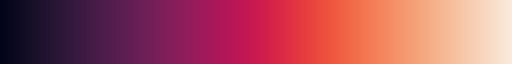

In [8]:
rocket_cmap_full = sns.color_palette(palette="rocket", as_cmap=True)
rocket_cmap_full

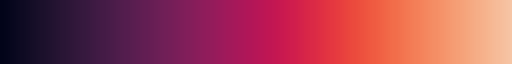

In [9]:
# Extract the pink side (the upper half of the colormap)
rocket_darkside = rocket_cmap_full(np.linspace(0.0, 0.9, 256))  # Adjust range for pink side
rocket_dark_cmap = LinearSegmentedColormap.from_list("rocket_darkside", rocket_darkside)
rocket_dark_cmap

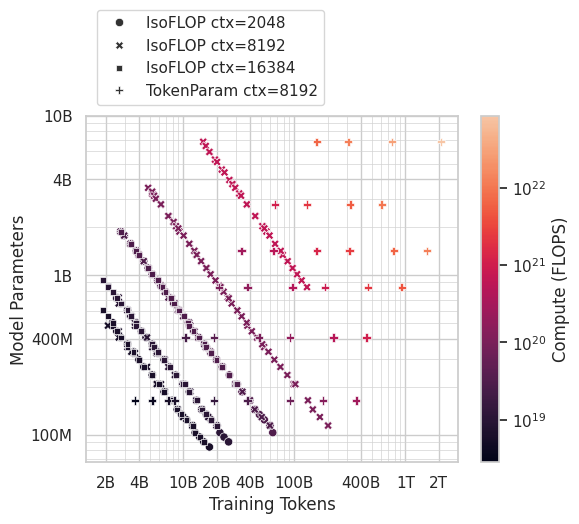

In [10]:
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        ax = create_run_data_scatter_plot(
            mlstm_df,
            x_col="num_tokens_training",
            y_col="num_params",
            c_col="num_flops_training",
            style_col="experiment_set_ctx_length",
            style_tags_legend={"isoflop_ctx2048": "IsoFLOP ctx=2048",
                               "isoflop_ctx8192": "IsoFLOP ctx=8192",
                               "isoflop_ctx16384": "IsoFLOP ctx=16384",
                               "tokenparam_ctx8192": "TokenParam ctx=8192",},
            xscale="log",
            yscale="log",
            c_norm=LogNorm(
                vmin=mlstm_df["num_flops_training"].min(),
                vmax=mlstm_df["num_flops_training"].max(),
            ),
            colormap=rocket_dark_cmap,
            xlabel="Training Tokens",
            ylabel="Model Parameters",
            clabel="Compute (FLOPS)",
        )

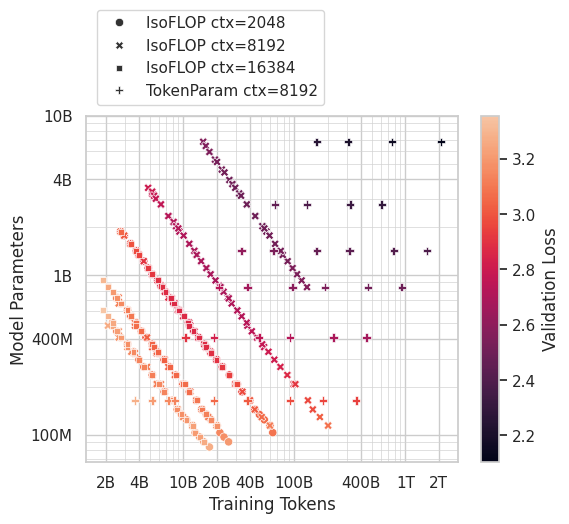

In [11]:
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        ax = create_run_data_scatter_plot(
            mlstm_df,
            x_col="num_tokens_training",
            y_col="num_params",
            c_col="val/.dclm_loss",
            style_col="experiment_set_ctx_length",
            style_tags_legend={"isoflop_ctx2048": "IsoFLOP ctx=2048",
                               "isoflop_ctx8192": "IsoFLOP ctx=8192",
                               "isoflop_ctx16384": "IsoFLOP ctx=16384",
                               "tokenparam_ctx8192": "TokenParam ctx=8192",},
            xscale="log",
            yscale="log",
            # c_norm=LogNorm(
            #     vmin=mlstm_df["val/.dclm_loss"].min(),
            #     vmax=mlstm_df["val/.dclm_loss"].max(),
            # ),
            c_norm=Normalize(
                vmin=mlstm_df["val/.dclm_loss"].min(),
                vmax=mlstm_df["val/.dclm_loss"].max(),
            ),
            colormap=rocket_dark_cmap,
            xlabel="Training Tokens",
            ylabel="Model Parameters",
            clabel="Validation Loss",
        )

In [12]:
llama_df = get_all_parametric_sclaw_fit_data_dataframe(model_type="llama")
llama_df

,experiment_set_ctx_length,name,run_tag,model_type,num_params,num_tokens_training,num_flops_training,val/.dclm_loss,token_param_ratio,width_depth_ratio,...,experiment_set,context_length,global_batch_size,num_train_steps,val/.dclm_perplexity,Preset Num Params,Model Size,embedding_dim,num_blocks,train/.loss_mean
345,isoflop_ctx2048,dclm_llama_500M_ctx2048_lr0.001_steps1800_nb27...,sclaw_llama_iso7,llama,5.459455e+08,1.887437e+09,6.255017e+18,3.471300,3.457189,42.666667,...,isoflop,2048,512.0,1800.0,32.178562,<700M,NaN,1152,27,3.470370
346,isoflop_ctx2048,dclm_llama_500M_ctx2048_lr0.001_steps2000_nb24...,sclaw_llama_iso7,llama,4.981628e+08,2.097152e+09,6.258815e+18,3.385770,4.209772,48.000000,...,isoflop,2048,512.0,2000.0,29.540728,<700M,NaN,1152,24,3.386807
347,isoflop_ctx2048,dclm_llama_400M_ctx2048_lr0.003_steps2000_nb30...,sclaw_llama_iso7,llama,4.825385e+08,2.097152e+09,6.230940e+18,3.381786,4.346082,34.133333,...,isoflop,2048,512.0,2000.0,29.423270,<700M,NaN,1024,30,3.382921
348,isoflop_ctx2048,dclm_llama_400M_ctx2048_lr0.003_steps2200_nb27...,sclaw_llama_iso7,llama,4.445870e+08,2.306867e+09,6.239929e+18,3.332383,5.188787,37.925926,...,isoflop,2048,512.0,2200.0,28.004987,<700M,NaN,1024,27,3.331900
349,isoflop_ctx2048,dclm_llama_400M_ctx2048_lr0.003_steps2400_nb24...,sclaw_llama_iso7,llama,4.066355e+08,2.516582e+09,6.137262e+18,3.251611,6.188791,42.666667,...,isoflop,2048,512.0,2400.0,25.831911,<440M,NaN,1024,24,3.250894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,tokenparam_ctx8192,dclm_llama_2.7B_ctx8192_lr0.0007_steps76000_gb...,scl_llama_2.7B,llama,2.779548e+09,3.187671e+11,6.373551e+21,2.336316,114.683066,80.000000,...,tokenparam,8192,512.0,76000.0,10.343060,NaN,2.7B,2560,32,2.337427
668,tokenparam_ctx8192,dclm_llama_2.7B_ctx8192_lr0.0007_steps146000_g...,scl_llama_2.7B,llama,2.779548e+09,6.123684e+11,1.224393e+22,2.294343,220.312205,80.000000,...,tokenparam,8192,512.0,146000.0,9.917916,NaN,2.7B,2560,32,2.293955
669,tokenparam_ctx8192,dclm_llama_7B_ctx8192_lr0.0005_steps76000_gbs256,scl_llama_7B,llama,6.863196e+09,1.593836e+11,7.403171e+21,2.278404,23.222934,128.000000,...,tokenparam,8192,256.0,76000.0,9.761085,NaN,7B,4096,32,2.276851
670,tokenparam_ctx8192,dclm_llama_7B_ctx8192_lr0.0005_steps145000_gbs256,scl_llama_7B,llama,6.863196e+09,3.040870e+11,1.412447e+22,2.224290,44.306914,128.000000,...,tokenparam,8192,256.0,145000.0,9.246912,NaN,7B,4096,32,2.227857


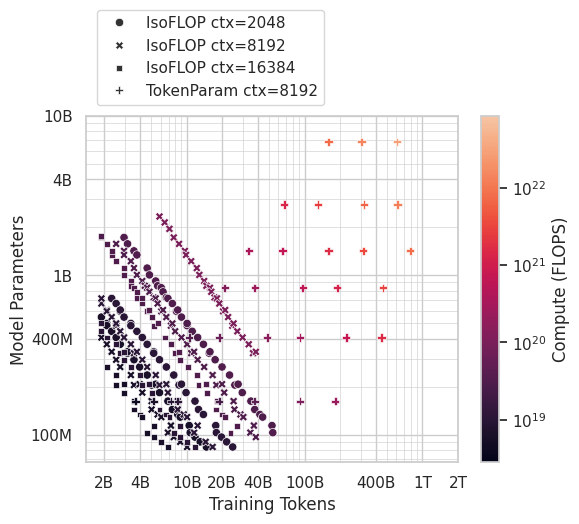

In [13]:
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        ax = create_run_data_scatter_plot(
            llama_df,
            x_col="num_tokens_training",
            y_col="num_params",
            c_col="num_flops_training",
            style_col="experiment_set_ctx_length",
            style_tags_legend={"isoflop_ctx2048": "IsoFLOP ctx=2048",
                               "isoflop_ctx8192": "IsoFLOP ctx=8192",
                               "isoflop_ctx16384": "IsoFLOP ctx=16384",
                               "tokenparam_ctx8192": "TokenParam ctx=8192",},
            xscale="log",
            yscale="log",
            c_norm=LogNorm(
                vmin=mlstm_df["num_flops_training"].min(),
                vmax=mlstm_df["num_flops_training"].max(),
            ),
            colormap=rocket_dark_cmap,
            xlabel="Training Tokens",
            ylabel="Model Parameters",
            clabel="Compute (FLOPS)",
        )

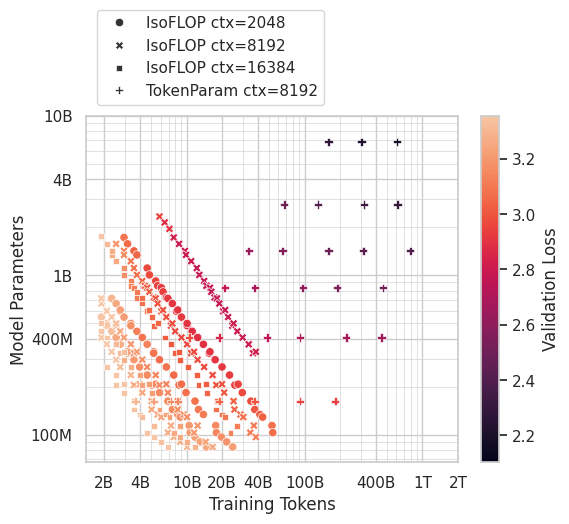

In [14]:
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        ax = create_run_data_scatter_plot(
            llama_df,
            x_col="num_tokens_training",
            y_col="num_params",
            c_col="val/.dclm_loss",
            style_col="experiment_set_ctx_length",
            style_tags_legend={
                "isoflop_ctx2048": "IsoFLOP ctx=2048",
                "isoflop_ctx8192": "IsoFLOP ctx=8192",
                "isoflop_ctx16384": "IsoFLOP ctx=16384",
                "tokenparam_ctx8192": "TokenParam ctx=8192",
            },
            xscale="log",
            yscale="log",
            # c_norm=LogNorm(
            #     vmin=mlstm_df["val/.dclm_loss"].min(),
            #     vmax=mlstm_df["val/.dclm_loss"].max(),
            # ),
            c_norm=Normalize(
                vmin=mlstm_df["val/.dclm_loss"].min(),
                vmax=mlstm_df["val/.dclm_loss"].max(),
            ),
            colormap=rocket_dark_cmap,
            xlabel="Training Tokens",
            ylabel="Model Parameters",
            clabel="Validation Loss",
        )

<Axes: xlabel='num_blocks', ylabel='embedding_dim'>

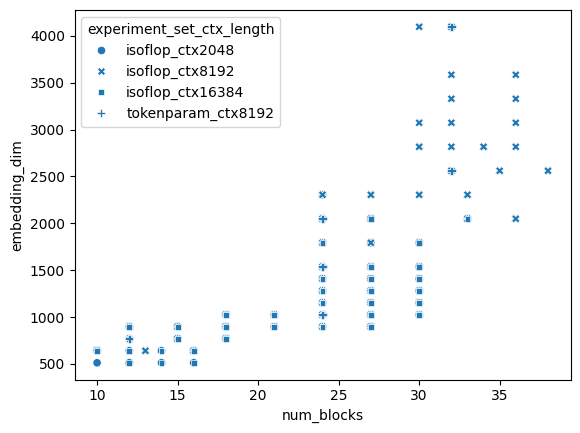

In [15]:
sns.scatterplot(data=mlstm_df, x="num_blocks", y="embedding_dim", style="experiment_set_ctx_length")

<Axes: xlabel='num_blocks', ylabel='embedding_dim'>

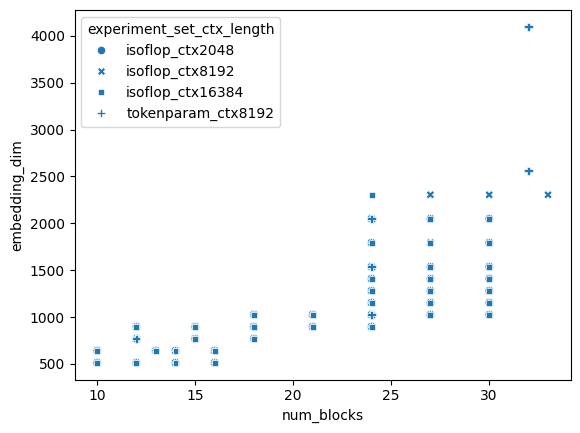

In [16]:
sns.scatterplot(data=llama_df, x="num_blocks", y="embedding_dim", style="experiment_set_ctx_length")